In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [3]:
def initialize_params(dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

In [4]:
def logistic(X, y, W, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    
    a = sigmoid(np.dot(X, W) + b)
    loss = -1/num_train * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
    
    dW = np.dot(X.T, (a-y))/num_train
    db = np.sum(a-y)/num_train
    loss = np.squeeze(loss)
    
    return a, loss, dW, db

In [5]:
def logistic_train(X, y, learning_rate, epochs):
    # initialize parameters
    W, b = initialize_params(X.shape[1])
    loss_list = []
    # gradient descent
    for i in range(epochs):
        a, loss, dW, db = logistic(X, y, W, b)
        W = W - learning_rate * dW
        b = b - learning_rate * db
    # print loss
    if i % 100 == 0:
        loss_list.append(loss)
        print('epoch %d loss %f' % (i, loss))
        
    params = {
        'W': W,
        'b': b
    }
    
    grads = {
        'dW': dW,
        'db': db
    }
    
    return  loss_list, params, grads

In [6]:
def predict(X, params):
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b'])
    for i in range(len(y_prediction)):
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
    return y_prediction

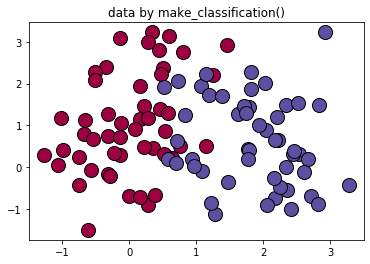

In [7]:
from sklearn.datasets.samples_generator import make_classification
X,labels=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)

unique_lables=set(labels)
colors=plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))
for k, col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k",
             markersize=14)
plt.title('data by make_classification()')
plt.show()

In [8]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [9]:
loss_list, params, grads = logistic_train(X_train, y_train, 0.01, 100000)

In [10]:
y_prediction = predict(X_test, params)
print(y_prediction)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [11]:
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):        
        for j in range(len(y_pred)):            
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1

    accuracy_score = correct_count / len(y_test)    
    return accuracy_score
    

In [13]:
accuracy_score_train = accuracy(y_train, predict(X_train, params))
print(accuracy_score_train)

accuracy_score_train = accuracy(y_test, predict(X_test, params))
print(accuracy_score_train)


0.9
1.0
